# **Evaluación y despliegue del modelo de mejor desempeño.**

---

A partir del entrenamiento y la identificación de Hiperparatmetros de apartados anteriores se realiza la evaluación del modelo con mejor desempeño, la creación del modelo en MLflow y le despliegue del modelo.



## **Librerias y Cargue de Datos**

In [1]:
%pip install mlflow requests
%pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import joblib
from sklearn import datasets
import pickle
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.metrics.cluster import contingency_matrix
import mlflow
import os
from IPython.display import display
from pyngrok import ngrok
import mlflow.sklearn

In [3]:
def list_confusion_matrix(cm,classes):
  df = pd.DataFrame(data = cm,
                    index = pd.MultiIndex.from_product([['Valor real'], classes]),
                    columns = pd.MultiIndex.from_product([['Valor predicho'], classes]))

  return df

In [4]:
DATA_URL = 'https://github.com/cris21309/tdsp_template_grupo8/blob/preprocesamiento/scripts/preprocessing/train_test_array.npz?raw=true'

path = tf.keras.utils.get_file('train_test_array.npz', DATA_URL)

with np.load(path) as data:
  X_train = data['X_train']
  X_test  = data['X_test']
  y_train = data['y_train']
  y_test = data['y_test']

12307690/12307690 [==============================] - 0s 0us/step


## **Evaluacion Random Forest con mejores Hiperparameros**
----
Teniendo en cuenta los resultados del entrenamiento se realiza el entrenamiento las métricas con el modelo de mejor desempeño, con los hiperparametros identificados y para la totalidad del conjunto de entrenamiento.

In [5]:
RF_model= RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=50).fit(X_train,y_train)

In [6]:
joblib.dump(RF_model, "RF_model.joblib")

['RF_model.joblib']

In [7]:
y_pred = RF_model.predict(X_test)

In [8]:
print(classification_report(y_test,y_pred, target_names=['No_Diabetes', 'Diabetes'], digits=4))

              precision    recall  f1-score   support

 No_Diabetes     0.9701    0.9995    0.9846     17534
    Diabetes     0.9923    0.6810    0.8077      1696

    accuracy                         0.9714     19230
   macro avg     0.9812    0.8403    0.8961     19230
weighted avg     0.9720    0.9714    0.9690     19230



In [9]:
#Estimación de los estadísticos de desempeño del modelo.
names=['No_Diabetes', 'Diabetes']
print(f'Orden de las etiquetas: {names}')
print(f'Precisión por clase: \t{precision_score(y_test, y_pred, average=None)}')
print(f'Recall por clase: \t{recall_score(y_test, y_pred, average=None)}')
print(f'F1 por clase: \t{f1_score(y_test, y_pred, average=None)}')

Orden de las etiquetas: ['No_Diabetes', 'Diabetes']
Precisión por clase: 	[0.97005425 0.99226804]
Recall por clase: 	[0.99948671 0.68101415]
F1 por clase: 	[0.98455056 0.80769231]


In [10]:
# Generación de la matriz de confusión.
RF_mat = confusion_matrix(y_test, y_pred)
list_confusion_matrix(RF_mat, ['No_Diabetes', 'Diabetes'])

Valor predicho         
                          No_Diabetes Diabetes
Valor real No_Diabetes          17525        9
           Diabetes               541     1155

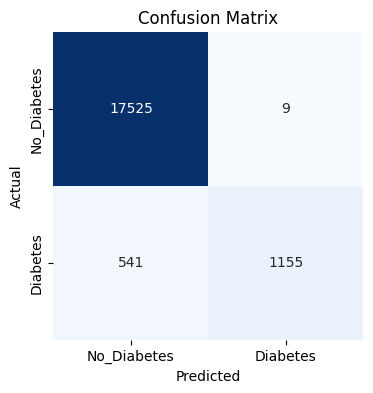

In [11]:
plt.figure(figsize=(4, 4))
sns.heatmap(RF_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

-----

Teniendo en cuenta los resultados de los apartados anteriores donde se realizó el entrenamiento de los diferentes modelos y se identificaron los mejores hiper parámetros, se realiza la evaluación completa del modelo. Se evidencia que para un clasificador basado en Random Forest se obtienen una exactitud de hasta 0.97 y con un buen desempeño en la estimación para las diferentes clases, siendo esto lo esperado en el desarrollo del proyecto.

---------

## **Creación del modelo en MLflow**

In [12]:
command = """
mlflow server \
        --backend-store-uri sqlite:///tracking.db \
        --default-artifact-root file:mlruns \
        -p 5000 &
"""
get_ipython().system_raw(command)

In [13]:
token = "2g7SPtfMGtcX3BItFTmTHSRCC9K_3q8NiKJS6sqDFY64EWkvE" # Agregue el token dentro de las comillas
os.environ["NGROK_TOKEN"] = token

In [14]:
!ngrok authtoken $NGROK_TOKEN
ngrok.connect(5000, "http")

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


<NgrokTunnel: "https://834d-35-236-254-128.ngrok-free.app" -> "http://localhost:5000">

In [15]:
mlflow.set_tracking_uri("http://localhost:5000")
exp_id = mlflow.create_experiment(name="diabetes", artifact_location="mlruns/")

In [16]:
with mlflow.start_run(
        run_name="Randon_Forest",
        experiment_id=exp_id
        ):
    model = RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=50)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    mlflow.sklearn.log_model(model, "model")

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## **Despliegue del modelo en MLflow**